### Ishaan Mehta E18CSE069 EB02 LabWeek3 Part2

In [2]:
!pip install numdifftools

In [26]:
import numpy as np
import numpy.linalg as npa
import numdifftools as nd
import matplotlib.pyplot as plt

In [4]:
m = np.random.rand(10,10)

In [5]:
m_inv = npa.inv(m)

In [6]:
np.dot(m, m.T)

array([[2.75499865, 2.54313101, 2.46375025, 1.19672683, 2.86525638,
        2.1792343 , 2.56538045, 3.82395928, 2.40626486, 2.01639178],
       [2.54313101, 3.22747549, 2.28627691, 1.38907752, 3.04391947,
        1.98160617, 3.08389592, 3.7737105 , 2.03138362, 2.26565497],
       [2.46375025, 2.28627691, 2.98502014, 1.43654664, 2.75615733,
        2.09754174, 2.4618011 , 3.62373438, 2.04038099, 2.26207577],
       [1.19672683, 1.38907752, 1.43654664, 0.95204131, 1.53426696,
        0.9461438 , 1.50177268, 1.74398333, 1.11637551, 1.16392872],
       [2.86525638, 3.04391947, 2.75615733, 1.53426696, 3.77749523,
        2.39628003, 2.88615647, 4.6210816 , 2.66173093, 2.40122167],
       [2.1792343 , 1.98160617, 2.09754174, 0.9461438 , 2.39628003,
        2.32531417, 1.7379467 , 3.21017202, 1.57503752, 2.12711176],
       [2.56538045, 3.08389592, 2.4618011 , 1.50177268, 2.88615647,
        1.7379467 , 3.88209998, 4.10347441, 2.15428727, 1.79767375],
       [3.82395928, 3.7737105 , 3.6237343

In [7]:
#eigen value and vector
w, v = npa.eig(m)

In [8]:
#Jacobian Matrix
func = lambda x : x**3
o = nd.Jacobian(func)(m)

In [9]:
def rosen(x): return (1-x[0])**2 + 105.*(x[1]-x[0]**2)**2
o = nd.Hessian(rosen)(m[1])

### Part2.2

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [11]:
# NOTE: DO NOT CHANGE THE VARIABLE NAME(S) IN THIS CELL
# Load the data
data = pd.read_csv('./challenge-week-3-master/data/diabetes_data.csv')

In [12]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [13]:
data.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
for name in data.columns:
    if(name != 'Age'):
        data[name] = encoder.fit_transform(data[name])
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
age_norm = scaler.fit_transform(pd.DataFrame(data.Age))
data.Age = age_norm
data.insert(0, "Atr0", [1]*len(data), allow_duplicates=True)
data.head()

,Atr0,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,1,0.324324,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,1,0.567568,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,1,0.337838,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,1,0.391892,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,1,0.594595,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [17]:
# Define your X and y
X = data.loc[:, data.columns != 'class'].values
y = np.array(data['class'])

In [18]:
# Split the dataset into training and testing here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [19]:
def predict(X, weights):
    '''Predict class for X.
    For the given dataset, predicted vector has only values 0/1
    Args:
        X : Numpy array (num_samples, num_features)
        weights : Model weights for logistic regression
    Returns:
        Binary predictions : (num_samples,)
    '''

    ### START CODE HERE ###
    z = X@weights
    logits = sigmoid(z)
    y_pred = logits.round()
    ### END CODE HERE ###
    
    return y_pred

In [20]:
def sigmoid(z):
        '''Sigmoid function: f:R->(0,1)
        Args:
            z : A numpy array (num_samples,)
        Returns:
            A numpy array where sigmoid function applied to every element
        '''
        ### START CODE HERE
        sig_z = 1/(1 + np.exp(-z))
        ### END CODE HERE
        
        assert (z.shape==sig_z.shape), 'Error in sigmoid implementation. Check carefully'
        return sig_z

In [21]:
def cross_entropy_loss(y_true, y_pred):
    '''Calculate cross entropy loss
    Note: Cross entropy is defined for multiple classes/labels as well
    but for this dataset we only need binary cross entropy loss
    Args:
        y_true : Numpy array of true values (0/1) of size (num_samples,)
        y_pred : Numpy array of predicted values (probabilites) of size (num_samples,)
    Returns:
        Cross entropy loss: A scalar value
    '''
    # Fix 0 values in y_pred
    y_pred = np.maximum(np.full(y_pred.shape, 1e-7), np.minimum(np.full(y_pred.shape, 1-1e-7), y_pred))
    
    ### START CODE HERE
    ce_loss = np.sum(-y_true*np.log(y_pred) - (1-y_true)*np.log(1-y_pred))
    ### END CODE HERE
    
    return ce_loss

In [22]:
def newton_optimization(X, y, max_iterations=15):
    '''Implement netwon method for optimizing weights
    Args:
        X : Numpy array (num_samples, num_features)
        max_iterations : Max iterations to update the weights
    Returns:
        Optimal weights (num_features,)
    '''
    num_samples = X.shape[0]
    num_features = X.shape[1]
    # Initialize random weights
    weights = np.zeros(num_features,)
    # Initialize losses
    losses = []
    
    # Newton Method
    for i in range(max_iterations):
        
        # Predict/Calculate probabilties using sigmoid function
        y_p = sigmoid(X@weights)
        
        #cost function
        
        # Define gradient for J (cost function) i.e. cross entropy loss
        gradient = ((1/num_samples)*X.T) @ (y_p - y)
        
        # Define hessian matrix for cross entropy loss
        hessian= ((1/num_samples)*X.T) @ (np.diag(y_p)) @ (np.diag(1-y_p)) @ X
        
        # Update the model using hessian matrix and gradient computed
        weights = weights - np.linalg.inv(hessian)@gradient
        
        # Calculate cross entropy loss
        loss = cross_entropy_loss(y, y_p)
        # Append it
        losses.append(loss)

    return weights, losses

In [23]:
# Train weights
weights, losses = newton_optimization(X_train, y_train)

In [24]:
'''

Listing all the failed implementations

Using numdifftools

cost = lambda x : (1/num_samples) * np.sum(-y*np.log(sigmoid(x@weights)) - (1-y)*np.log(1-sigmoid(x@weights)))
gradient = nd.Gradient(cost)(X)
hessian = nd.Hessian(cost)(X)


Hessian implementation

exp = np.zeros((num_features, num_features))
for i in range(num_samples):
    exp += (y_p[i]*(1-y_p[i]))*(X[i,:].T@X[i,:])
hessian = (1/num_samples) * exp

'''
print('Failed Implementations commented')

Failed Implementations commented


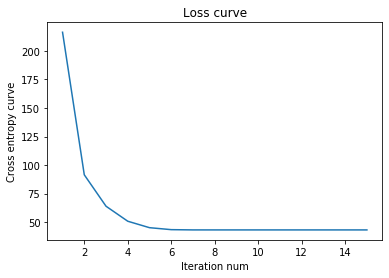

In [27]:
# Plot the loss curve
plt.plot([i+1 for i in range(len(losses))], losses)
plt.title("Loss curve")
plt.xlabel("Iteration num")
plt.ylabel("Cross entropy curve")
plt.show()

In [28]:
    our_model_test_acuracy = accuracy_score(y_test, predict(X_test, weights))

print(f"\nAccuracy in testing set by our model: {our_model_test_acuracy}")


Accuracy in testing set by our model: 0.8894230769230769


In [29]:
# Initialize the model
model = LogisticRegression(solver='newton-cg', verbose=1)

In [30]:
# Fit the model. Wait! We will complete this step for you ;)
model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=1,
                   warm_start=False)

In [31]:
# Predict on testing set X_test
y_pred = model.predict(X_test)

In [32]:
# Print Accuracy on testing set
sklearn_test_accuracy = accuracy_score(y_test, y_pred)

print(f"\nAccuracy in testing set by sklearn model: {sklearn_test_accuracy}")


Accuracy in testing set by sklearn model: 0.8798076923076923
